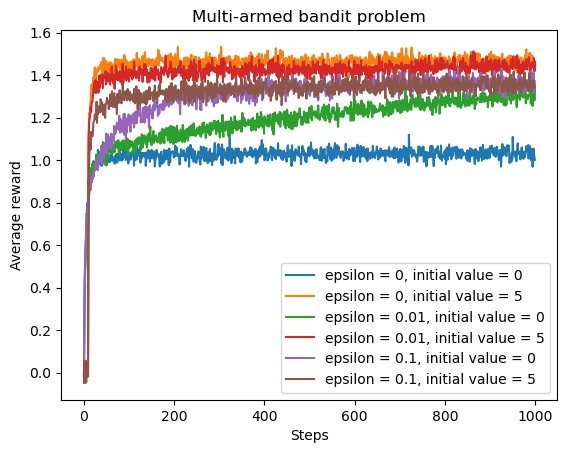

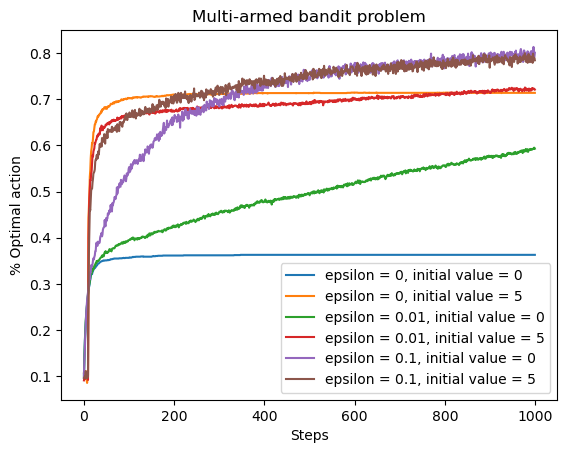

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k, epsilon=0.1, initial_value=0):
        self.k = k
        self.epsilon = epsilon
        self.initial_value = initial_value
        self.q_true = np.random.randn(self.k)
        self.q_est = np.zeros(self.k) + initial_value
        self.action_counts = np.zeros(self.k)

    def choose_action(self):
        if np.random.uniform() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_est)

    def take_action(self, action):
        reward = np.random.normal(self.q_true[action], 1)
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_est[action] += 1/n * (reward - self.q_est[action])
        return reward

def simulate_bandit(k, num_steps, num_runs, epsilons, initial_values):
    rewards = np.zeros((len(epsilons), len(initial_values), num_runs, num_steps))
    optimal_actions = np.zeros((len(epsilons), len(initial_values), num_runs, num_steps))

    for i, epsilon in enumerate(epsilons):
        for j, initial_value in enumerate(initial_values):
            for run in range(num_runs):
                bandit = Bandit(k, epsilon, initial_value)
                for step in range(num_steps):
                    action = bandit.choose_action()
                    reward = bandit.take_action(action)
                    rewards[i, j, run, step] = reward
                    optimal_actions[i, j, run, step] = (action == np.argmax(bandit.q_true))

    mean_rewards = np.mean(rewards, axis=2)
    mean_optimal_actions = np.mean(optimal_actions, axis=2)
    return mean_rewards, mean_optimal_actions

if __name__ == '__main__':
    k = 10
    num_steps = 1000
    num_runs = 2000
    epsilons = [0, 0.01, 0.1]
    initial_values = [0, 5]

    mean_rewards, mean_optimal_actions = simulate_bandit(k, num_steps, num_runs, epsilons, initial_values)

    for i, epsilon in enumerate(epsilons):
        for j, initial_value in enumerate(initial_values):
            plt.plot(mean_rewards[i,j], label='epsilon = {}, initial value = {}'.format(epsilon, initial_value))

    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.title('Multi-armed bandit problem')
    plt.legend()
    plt.show()

    for i, epsilon in enumerate(epsilons):
        for j, initial_value in enumerate(initial_values):
            plt.plot(mean_optimal_actions[i,j], label='epsilon = {}, initial value = {}'.format(epsilon, initial_value))

    plt.xlabel('Steps')
    plt.ylabel('% Optimal action')
    plt.title('Multi-armed bandit problem')
    plt.legend()
    plt.show()